1. use Dorito-by-time data to look at time series and find an efficient method to remove seasonality
2. after selecting a method, use that method to remove seasonality for each FSA.

## 1. Identify which method to use

### 1.1 import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

df = pd.read_csv('C:/Users/80250678/Desktop/Media/Flaming Hot/time series/Dorito_time.csv')
df

,sales,date
0,3817658.480,1/6/2018
1,6668008.060,2/1/2020
2,6206244.422,4/4/2020
3,5295931.910,2/10/2018
4,4710018.800,4/21/2018
...,...,...
119,4605660.830,12/1/2018
120,5578753.530,12/14/2019
121,5732494.960,2/15/2020
122,5695087.738,4/25/2020


### 1.2 Data Wrangling

In [2]:
df['date'] = pd.to_datetime(df['date'])
ts = df.sort_values(by=['date'])

ts.set_index('date',inplace=True)

In [3]:
ts

,sales
date,
2018-01-06,3817658.480
2018-01-13,3921779.230
2018-01-20,4600659.690
2018-01-27,5088864.540
2018-02-03,6609959.740
...,...
2020-04-18,5379801.290
2020-04-25,5695087.738
2020-05-02,5016393.360


### 1.3 Get an Overview of Time Series

Text(0, 0.5, 'Weekly Sales')

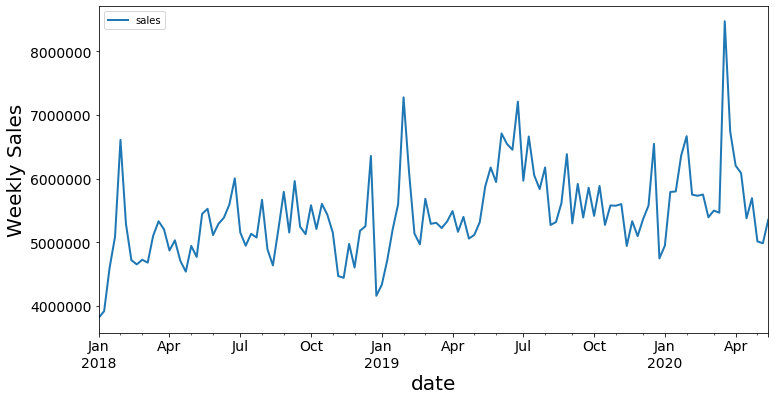

In [4]:
ts.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('date', fontsize=20)
plt.ylabel("Weekly Sales", fontsize=20)

### 1.4 Rolling Mean

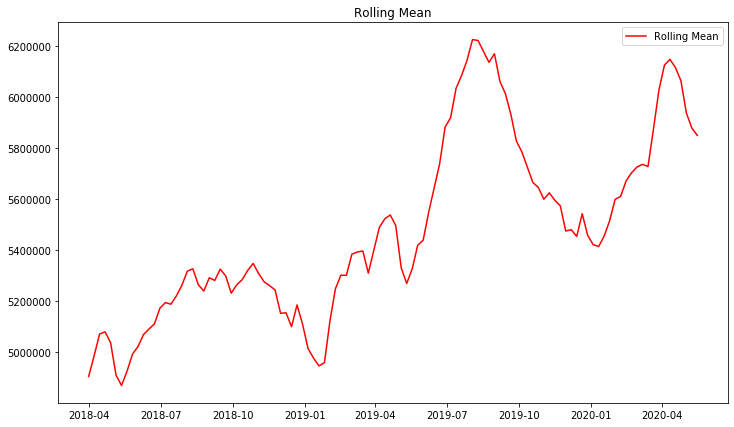

In [13]:
# a season has 13 weeks, window = 13 #
rolmean = ts.rolling(window = 13, center = False).mean()

fig = plt.figure(figsize=(12,7))
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

### 1.5 Subtracting Differecing 

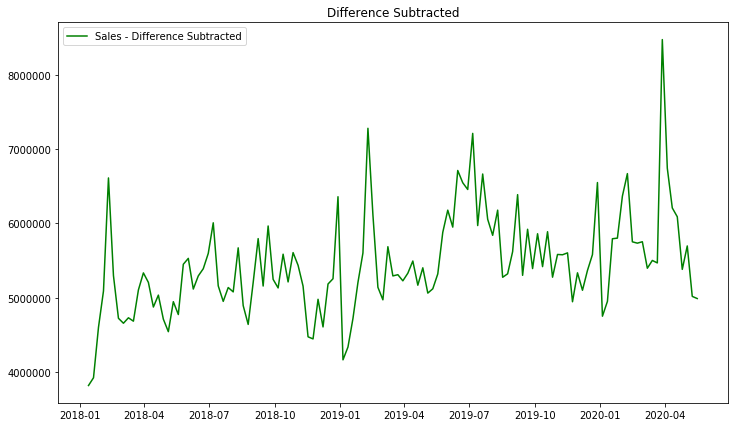

In [16]:
ts_diff = ts.diff(periods=1)
ts_minus_diff = ts - ts_diff

ts_minus_diff.dropna(inplace=True)

fig = plt.figure(figsize=(12,7))
plt.plot(ts_minus_diff,color = 'green', label='Sales - Difference Subtracted')
plt.legend()
plt.title('Difference Subtracted')
plt.show(block=False)

### 1.6 Decomposition

In [42]:
decomposition = seasonal_decompose(ts, model="additive",period=13)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


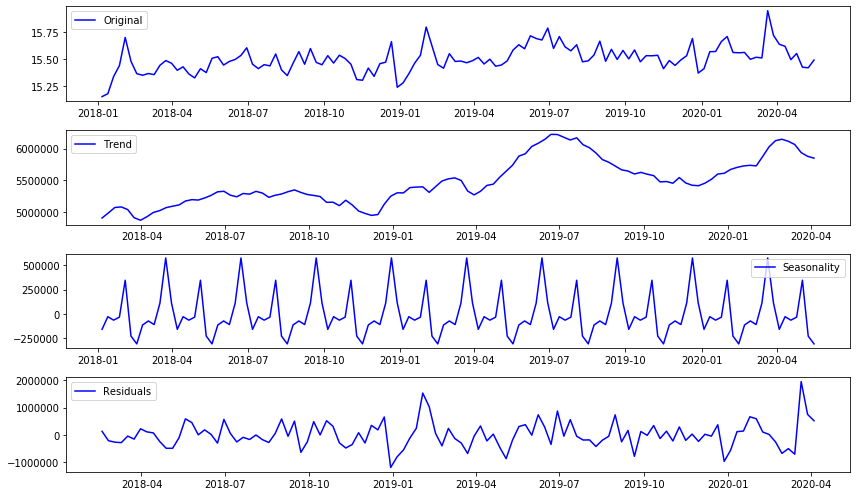

In [43]:
plt.figure(figsize=(12,7))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

### 1.7 Compare Different Methods

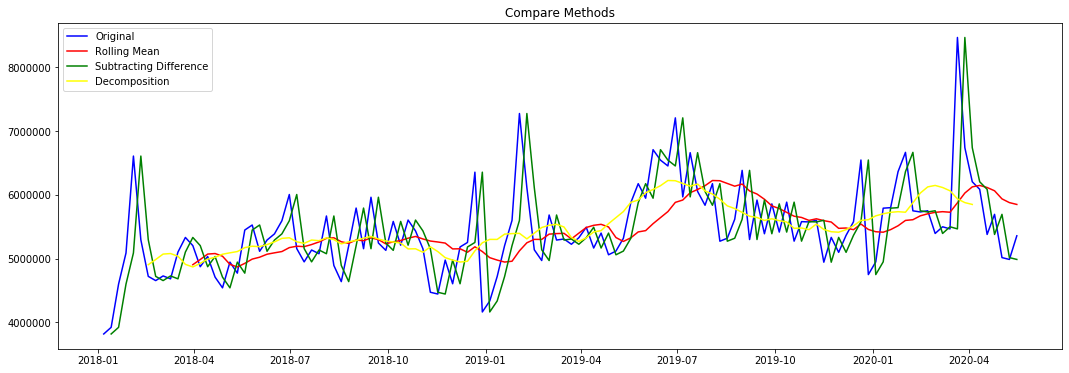

In [37]:
fig = plt.figure(figsize=(18,6))
origin = plt.plot(ts, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
diff = plt.plot(ts_minus_diff, color='green', label = 'Subtracting Difference')
decomp = plt.plot(trend, color='yellow', label = 'Decomposition')
plt.legend(loc='best')
plt.title('Compare Methods')
plt.show(block=False)

Decomposition is the best.

## 2. Apply decomposition to each FSA

### 2.1 import

In [9]:
Dor = pd.read_csv('C:/Users/80250678/Desktop/Media/Flaming Hot/input_files/Dorito/For_removing_seasonality_Dor.csv')
Dor

,fsa,end_date,avg_unit,avg_sales
0,V0K,5/25/2019,59,148.881081
1,B0K,6/29/2019,83,190.160345
2,V2S,5/26/2018,143,426.887000
3,E2L,6/8/2019,90,171.534375
4,L9S,4/4/2020,97,280.271053
...,...,...,...,...
187226,G3S,8/3/2019,130,432.660000
187227,H7Y,6/16/2018,52,150.480000
187228,E7K,6/9/2018,34,78.950000
187229,H1C,12/29/2018,56,123.480000


### 2.2 For sales

In [28]:
Dor_sales=Dor[['fsa','end_date','avg_sales']]
Dor_sales

,fsa,end_date,avg_sales
0,V0K,5/25/2019,148.881081
1,B0K,6/29/2019,190.160345
2,V2S,5/26/2018,426.887000
3,E2L,6/8/2019,171.534375
4,L9S,4/4/2020,280.271053
...,...,...,...
187226,G3S,8/3/2019,432.660000
187227,H7Y,6/16/2018,150.480000
187228,E7K,6/9/2018,78.950000
187229,H1C,12/29/2018,123.480000


### 2.3 Decomposition for each FSA

get fsa list for loop

In [30]:
fsa_list = Dor_sales['fsa'].tolist()
fsa_list = list(dict.fromkeys(fsa_list))

create a empty dataframe

In [31]:
emp_df = pd.DataFrame(columns=['end_date', 'trend', 'fsa'])

Loop

In [32]:
for i in fsa_list:

    Dor_sales_i = Dor_sales[Dor_sales['fsa']==i]
    Dor_sales_i = Dor_sales_i[['end_date','avg_sales']]
    Dor_sales_i
    
    Dor_sales_i['end_date'] = pd.to_datetime(Dor_sales_i['end_date'])
    ts = Dor_sales_i.sort_values(by=['end_date'])
    
    ts.set_index('end_date',inplace=True)
    
    decomposition = seasonal_decompose(ts, model="additive",period=13)
    trend = decomposition.trend
    trend.dropna(inplace=True)
    
    trend = trend.to_frame().reset_index()
    trend['fsa']=i
    
    emp_df = pd.concat([emp_df,trend])
emp_df

,end_date,trend,fsa
0,2018-02-17,75.948674,V0K
1,2018-02-24,78.057943,V0K
2,2018-03-03,79.732954,V0K
3,2018-03-10,79.846695,V0K
4,2018-03-17,80.018991,V0K
...,...,...,...
107,2020-03-07,559.519198,L5L
108,2020-03-14,559.957282,L5L
109,2020-03-21,544.750208,L5L
110,2020-03-28,548.665109,L5L


get seasonality adjusted sales data

In [33]:
sales_adjust = emp_df.rename(columns={'trend':'sales'})
sales_adjust

,end_date,sales,fsa
0,2018-02-17,75.948674,V0K
1,2018-02-24,78.057943,V0K
2,2018-03-03,79.732954,V0K
3,2018-03-10,79.846695,V0K
4,2018-03-17,80.018991,V0K
...,...,...,...
107,2020-03-07,559.519198,L5L
108,2020-03-14,559.957282,L5L
109,2020-03-21,544.750208,L5L
110,2020-03-28,548.665109,L5L


before covid-19

In [39]:
sales_adjust=sales_adjust[sales_adjust['end_date']< '2020-03-21']
sales_adjust

,end_date,sales,fsa
0,2018-02-17,75.948674,V0K
1,2018-02-24,78.057943,V0K
2,2018-03-03,79.732954,V0K
3,2018-03-10,79.846695,V0K
4,2018-03-17,80.018991,V0K
...,...,...,...
104,2020-02-15,525.077954,L5L
105,2020-02-22,535.216730,L5L
106,2020-02-29,553.431792,L5L
107,2020-03-07,559.519198,L5L


### 2.3 For unit

In [34]:
Dor_unit=Dor[['fsa','end_date','avg_unit']]
Dor_unit

,fsa,end_date,avg_unit
0,V0K,5/25/2019,59
1,B0K,6/29/2019,83
2,V2S,5/26/2018,143
3,E2L,6/8/2019,90
4,L9S,4/4/2020,97
...,...,...,...
187226,G3S,8/3/2019,130
187227,H7Y,6/16/2018,52
187228,E7K,6/9/2018,34
187229,H1C,12/29/2018,56


In [35]:
### get fsa list for loop

fsa_list = Dor_unit['fsa'].tolist()
fsa_list = list(dict.fromkeys(fsa_list))

### create a empty dataframe

emp_df = pd.DataFrame(columns=['end_date', 'trend', 'fsa'])

### Loop

for i in fsa_list:

    Dor_unit_i = Dor_unit[Dor_unit['fsa']==i]
    Dor_unit_i = Dor_unit_i[['end_date','avg_unit']]
    Dor_unit_i
    
    Dor_unit_i['end_date'] = pd.to_datetime(Dor_unit_i['end_date'])
    ts = Dor_unit_i.sort_values(by=['end_date'])
    
    ts.set_index('end_date',inplace=True)
    
    decomposition = seasonal_decompose(ts, model="additive",period=13)
    trend = decomposition.trend
    trend.dropna(inplace=True)
    
    trend = trend.to_frame().reset_index()
    trend['fsa']=i
    
    emp_df = pd.concat([emp_df,trend])
    
unit_adjust = emp_df.rename(columns={'trend':'unit'})

In [40]:
unit_adjust=unit_adjust[unit_adjust['end_date']< '2020-03-21']
unit_adjust

,end_date,unit,fsa
0,2018-02-17,31.307692,V0K
1,2018-02-24,32.153846,V0K
2,2018-03-03,32.692308,V0K
3,2018-03-10,32.769231,V0K
4,2018-03-17,32.923077,V0K
...,...,...,...
104,2020-02-15,152.692308,L5L
105,2020-02-22,154.846154,L5L
106,2020-02-29,159.000000,L5L
107,2020-03-07,160.230769,L5L


### 2.4 Export

In [41]:
season_adj = pd.merge(sales_adjust,unit_adjust,on=['fsa','end_date'],how='inner')
season_adj

,end_date,sales,fsa,unit
0,2018-02-17,75.948674,V0K,31.307692
1,2018-02-24,78.057943,V0K,32.153846
2,2018-03-03,79.732954,V0K,32.692308
3,2018-03-10,79.846695,V0K,32.769231
4,2018-03-17,80.018991,V0K,32.923077
...,...,...,...,...
164584,2020-02-15,525.077954,L5L,152.692308
164585,2020-02-22,535.216730,L5L,154.846154
164586,2020-02-29,553.431792,L5L,159.000000
164587,2020-03-07,559.519198,L5L,160.230769


In [43]:
season_adj.to_csv('C:/Users/80250678/Desktop/Media/Flaming Hot/input_files/Dorito/season_adjust_Dor.csv')